<a href="https://colab.research.google.com/github/nilesh0109/ML_SoSe19/blob/master/ML_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#randomly assigning the epsilon and x

np.random.seed(100)
x = np.random.rand(100)
epsilon= np.random.rand(100) * 0.6 - 0.3

In [0]:
y = np.sin(2 * np.pi * x) + epsilon
y_sin = np.sin(2 * np.pi * np.arange(0,1,0.01))

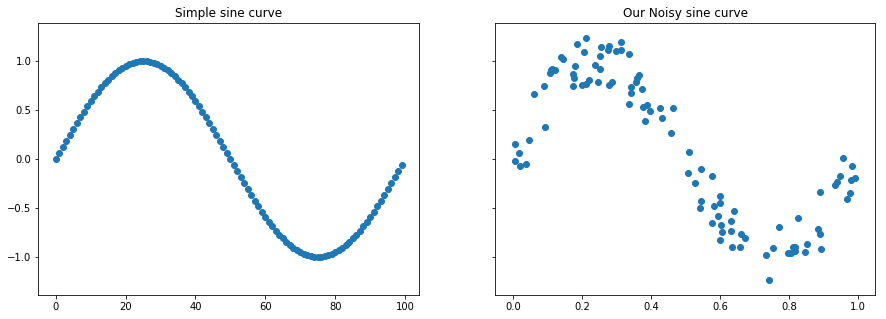

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

ax1.scatter(np.arange(0,100,1), y_sin)
ax2.scatter(x, y)

ax1.set_title('Simple sine curve')
ax2.set_title('Our Noisy sine curve')
plt.show()

# Initialize Model parameter

In [0]:
initial_theta = np.random.rand(4) * 0.6 - 0.3
h_initial = np.empty_like(y)
h_initial = initial_theta[0] + initial_theta[1] * x + initial_theta[2] * np.power(x, 2) + initial_theta[3] * np.power(x, 3)

In [0]:
learning_rates = np.arange(0, 0.1, 0.01) 
min_error = 1000000.0
best_lr = -1
best_h = -1
best_theta = -1

Trying different alpha values [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]

In [0]:

for i,lr in enumerate(learning_rates):
  theta = initial_theta 
  h = np.empty_like(y)
  for itr in np.arange(5000):
    for ind in np.arange(0, np.size(x)):
      h[ind] = theta[0] + theta[1] * x[ind] + theta[2] * np.power(x[ind], 2) + theta[3] * np.power(x[ind], 3)
      theta = theta + lr * (y[ind] - h[ind]) * np.array([1, x[ind], np.power(x[ind],2), np.power(x[ind],3)])
      
  error = np.sum(np.square(h - y))
  print('error in loop {} is {} '.format(i, error))
  if(error < min_error):
    min_error = error
    best_lr = lr
    best_h = h
    best_theta = theta
  
    
    

error in loop 0 is 62.71400604056108 
error in loop 1 is 9.682883801204737 
error in loop 2 is 5.442105321655665 
error in loop 3 is 4.016454663723649 
error in loop 4 is 3.5613473617538065 
error in loop 5 is 3.438883128717396 
error in loop 6 is 3.4303300718909076 
error in loop 7 is 3.4605692303281925 
error in loop 8 is 3.503783184943715 
error in loop 9 is 3.551157270594733 


In [0]:
print('best_lr is ', best_lr)
print('sum of squared error for best learning rate is ', min_error)
print('theta for best learning rate is ', theta)

best_lr is  0.06
sum of squared error for best learning rate is  3.4303300718909076
theta for best learning rate is  [ -0.09753824  11.41412049 -33.760093    22.64139918]


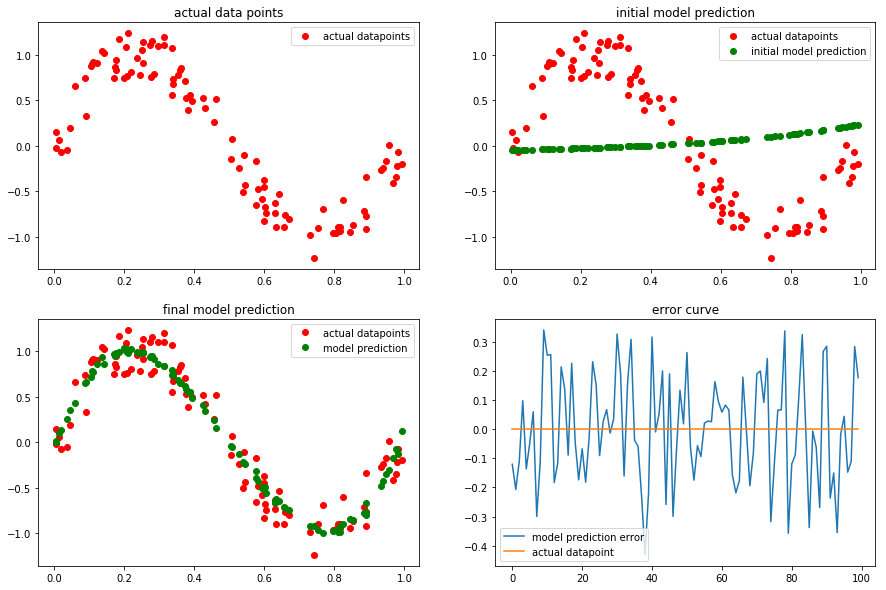

In [0]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

ax1.plot(x, y, 'ro', label='actual datapoints')
ax1.legend()

ax2.plot(x, y, 'ro', label='actual datapoints')
ax2.plot(x, h_initial, 'go', label='initial model prediction')
ax2.legend()

ax3.plot(x, y, 'ro', label='actual datapoints')
ax3.plot(x, best_h, 'go', label='model prediction')
ax3.legend()

ax4.plot(best_h - y, label='model prediction error')
ax4.plot(y - y, label='actual datapoint')
ax4.legend()

ax1.set_title('actual data points')
ax2.set_title('initial model prediction')
ax3.set_title('final model prediction')
ax4.set_title('error curve')
plt.show()

# REPORT

We tried 10 learning rates [0. 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09] and for each learning rate we evaluated our predicted value(h)
which is h = theta[0] + x * theta[1] + x2 * theta[2] + x3 * theta[3]. 
we then found the best learning rate that minimizes the squared sum of errors between our predicton and actual output. 
We used stocastic gradient descend and improved the model for 5000 epochs.

---


The best learning rate that minimizes the squared sum of errors is 0.06 after 5000 epochs.


---


The value of theta is [ -0.09749368  11.4136278  -33.75890485  22.64062356]

---


Minimum squared sum of error is  3.4305791772936107